C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


 SHAP array shape: (2, 30, 114)
X_test shape: (114, 30)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13884\117839516.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13884\117839516.py:62: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


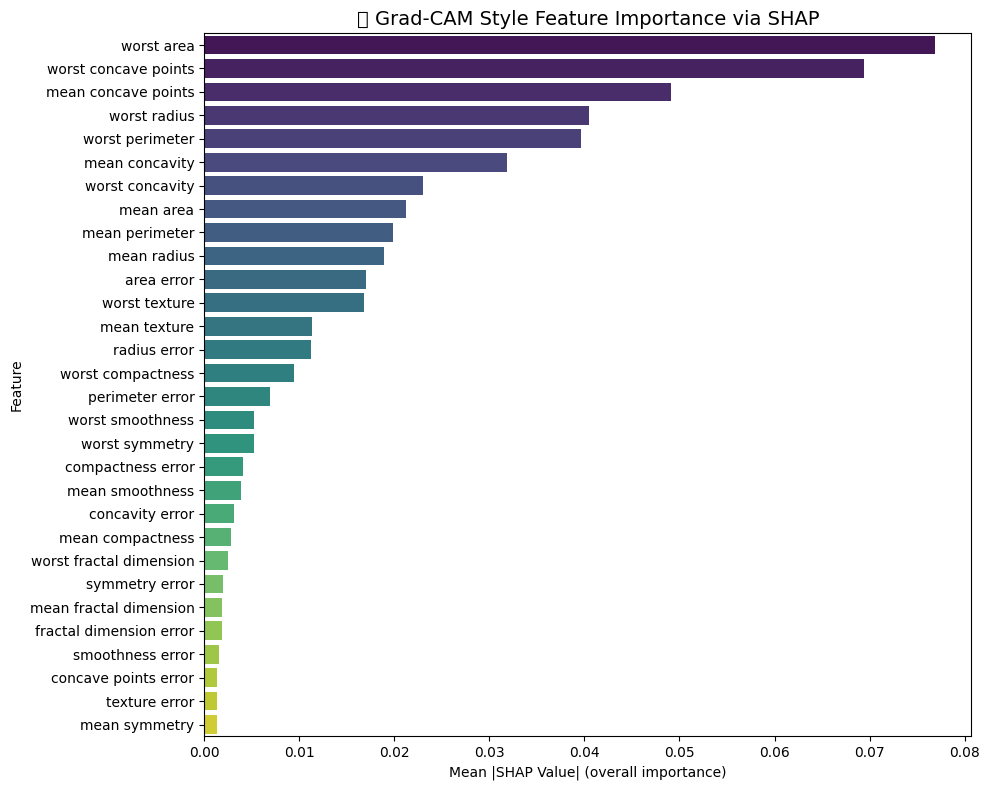

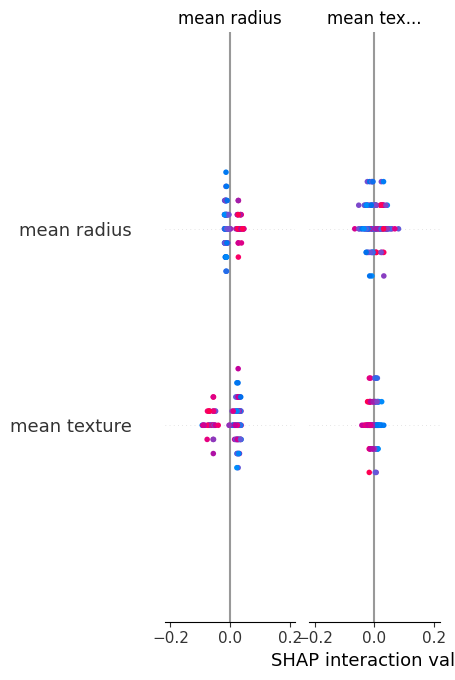

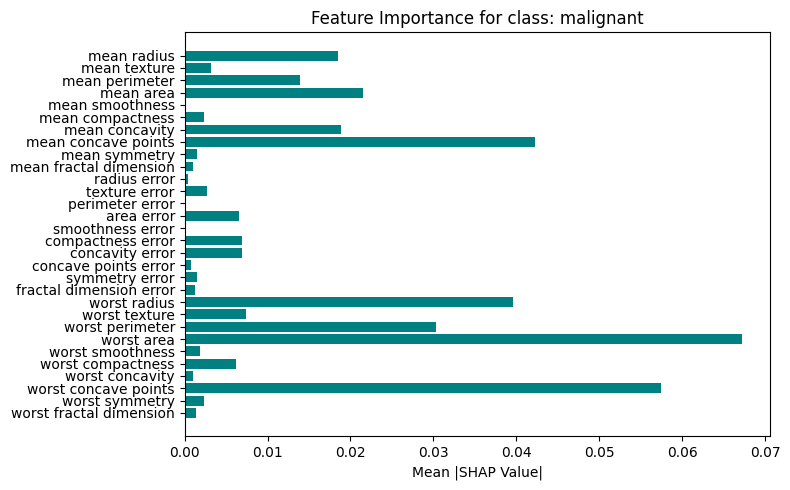

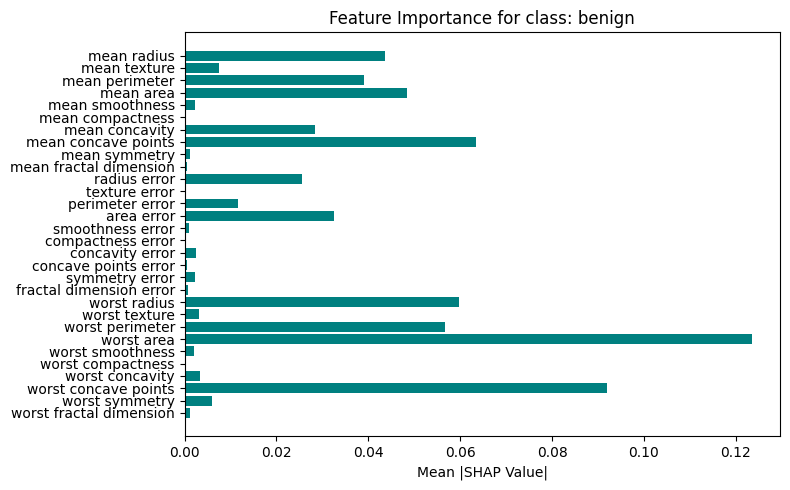

In [1]:
# ===========================================
# SHAP + Grad-CAM Style Feature Visualization
# ===========================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# -----------------------------
#  Load and prepare data
# -----------------------------
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------
# Train a model
# -----------------------------
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# -----------------------------
# Compute SHAP values
# -----------------------------
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Convert to numpy array for flexibility
shap_array = np.array(shap_values)  # shape (2, 200, 30)
shap_array = np.swapaxes(shap_array, 0, 2)  # (200, 30, 2)

print(" SHAP array shape:", shap_array.shape)  # (200, 30, 2)
print("X_test shape:", X_test.shape)

# -----------------------------
# Aggregate for Grad-CAM style importance
# -----------------------------
# Take mean absolute shap value across samples and classes
feature_importance = np.mean(np.abs(shap_array), axis=(0, 2))  # shape (30,)

# Create dataframe for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# -----------------------------
# Plot - Grad-CAM style bar visualization
# -----------------------------
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('🔬 Grad-CAM Style Feature Importance via SHAP', fontsize=14)
plt.xlabel('Mean |SHAP Value| (overall importance)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# -----------------------------
# Optional: SHAP Summary Plot
# -----------------------------
shap.summary_plot(shap_values, X_test, plot_type='dot', show=True)

# -----------------------------
# Per-Class Feature Importance (bonus)
# -----------------------------
class_importance = np.mean(np.abs(shap_array), axis=0)  # shape (30, 2)

for i, class_name in enumerate(data.target_names):
    plt.figure(figsize=(8, 5))
    plt.barh(X_test.columns, class_importance[:, i], color='teal')
    plt.title(f'Feature Importance for class: {class_name}')
    plt.gca().invert_yaxis()
    plt.xlabel('Mean |SHAP Value|')
    plt.tight_layout()
    plt.show()
